In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors

%config InlineBackend.figure_format = 'retina' 

## **Architecture Analysis**

Analyzing the performance of varying architectures for solving the Burgers' problem.

I trained networks by varying the number of hidden layers and the number of neurons per hidden layer. A network with a given architecture was trained 5 times (with different random seeds) and the average test loss was recorded. 

Each point on the following plots corresponds to a particular network architecture. 

In [2]:
# import data 
data = pd.read_csv('burger_architectures.csv')
data.head()

,hidden_layers,neurons_per_layer,trainable_params,test_loss,test_loss_seed1,test_loss_seed2,test_loss_seed3,test_loss_seed4,test_loss_seed5,training_time_seconds,avg_test_loss
0,1,2,15,0.194524,0.194524,0.131257,0.174487,0.196602,0.157048,12.749334,0.170783
1,1,3,25,0.096176,0.096176,0.138409,0.115466,0.151274,0.138329,16.242209,0.127931
2,1,4,37,0.101580,0.101580,0.082434,0.126595,0.075552,0.059581,22.415210,0.089148
3,1,5,51,0.057397,0.057397,0.070385,0.043807,0.054234,0.043868,25.096590,0.053938
4,1,6,67,0.063703,0.046973,0.052264,0.052205,0.058765,0.050100,24.731609,0.052061


In [3]:
# compute a new col for the neurons/layers
data['neurons/layers'] = data['neurons_per_layer'] / data['hidden_layers']
data['layers/neurons'] = data['hidden_layers'] / data['neurons_per_layer']

data.head(5)

,hidden_layers,neurons_per_layer,trainable_params,test_loss,test_loss_seed1,test_loss_seed2,test_loss_seed3,test_loss_seed4,test_loss_seed5,training_time_seconds,avg_test_loss,neurons/layers,layers/neurons
0,1,2,15,0.194524,0.194524,0.131257,0.174487,0.196602,0.157048,12.749334,0.170783,2.0,0.500000
1,1,3,25,0.096176,0.096176,0.138409,0.115466,0.151274,0.138329,16.242209,0.127931,3.0,0.333333
2,1,4,37,0.101580,0.101580,0.082434,0.126595,0.075552,0.059581,22.415210,0.089148,4.0,0.250000
3,1,5,51,0.057397,0.057397,0.070385,0.043807,0.054234,0.043868,25.096590,0.053938,5.0,0.200000
4,1,6,67,0.063703,0.046973,0.052264,0.052205,0.058765,0.050100,24.731609,0.052061,6.0,0.166667


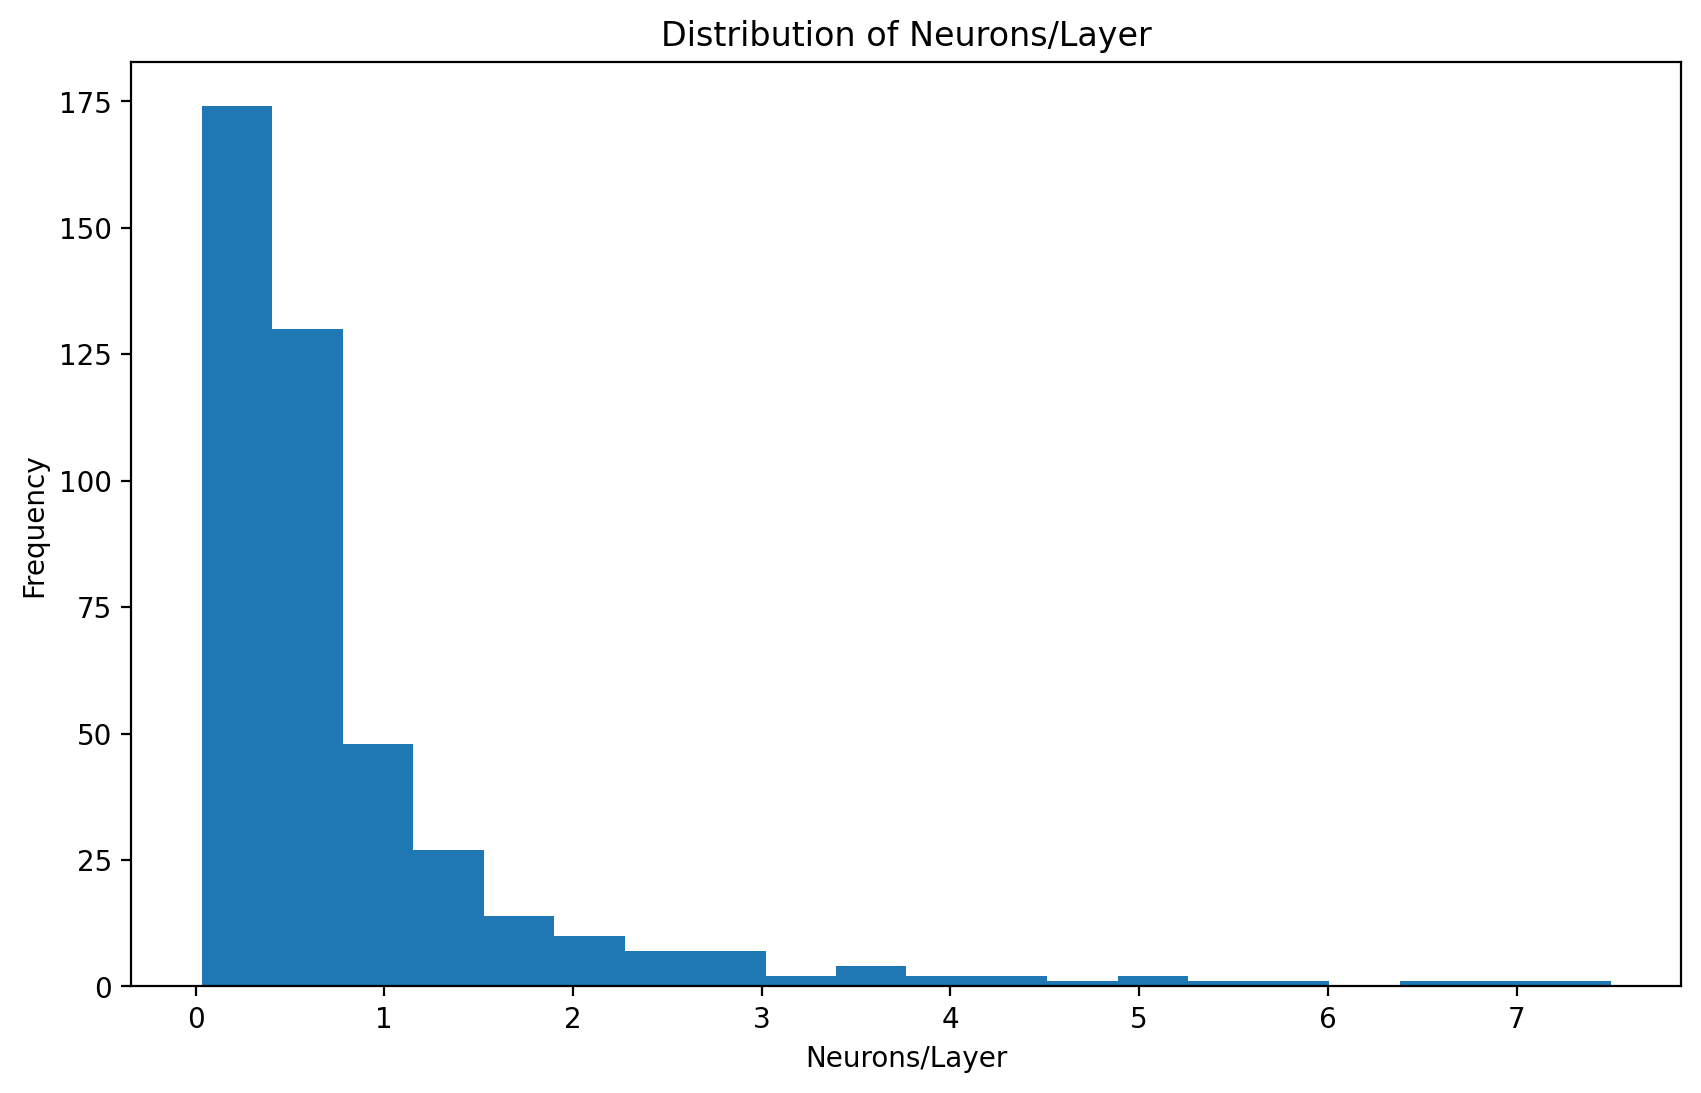

In [11]:
# plot distribution of neurons/layers
plt.figure(figsize=(10,6))
plt.hist(data['layers/neurons'], bins=20)
plt.xlabel('Neurons/Layer')
plt.ylabel('Frequency')
plt.title('Distribution of Neurons/Layer')
plt.show()

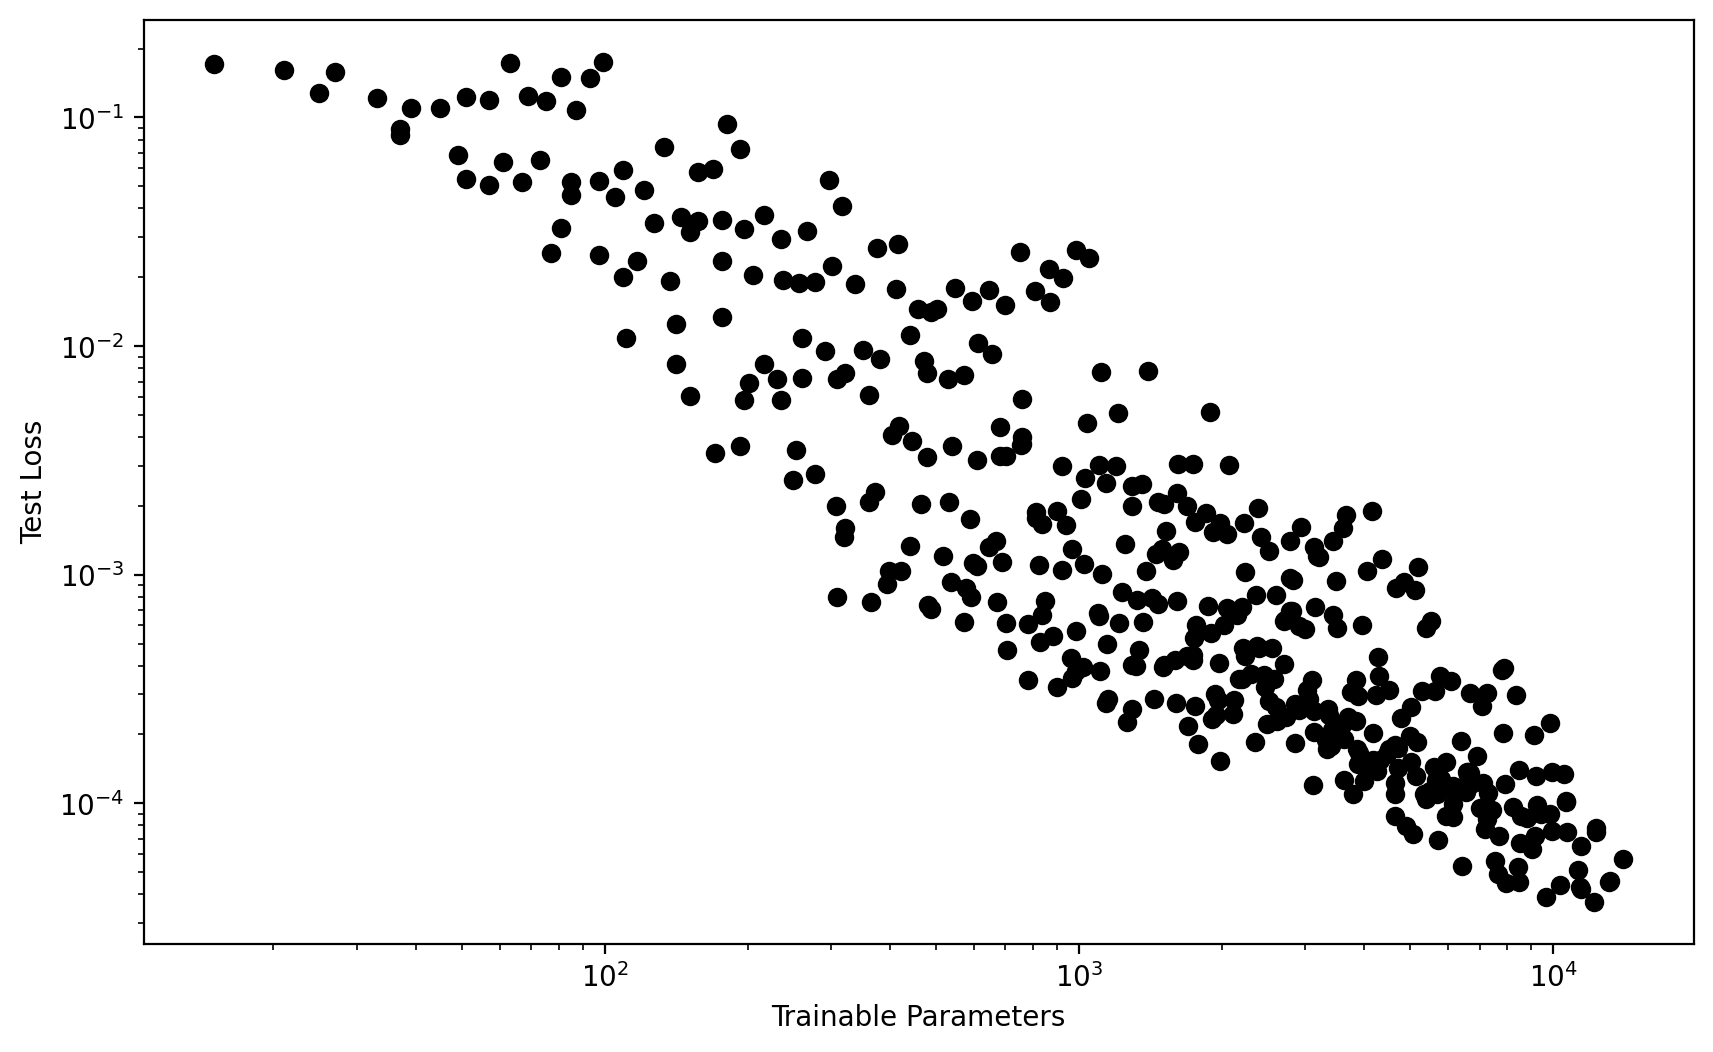

In [5]:
# plot trainable_params(x) vs. test_loss(y)
plt.figure(figsize=(10,6))
scatter = plt.scatter(data['trainable_params'], data['avg_test_loss'], color='black')
plt.xlabel('Trainable Parameters')
plt.ylabel('Test Loss')
plt.yscale('log')
plt.xscale('log')

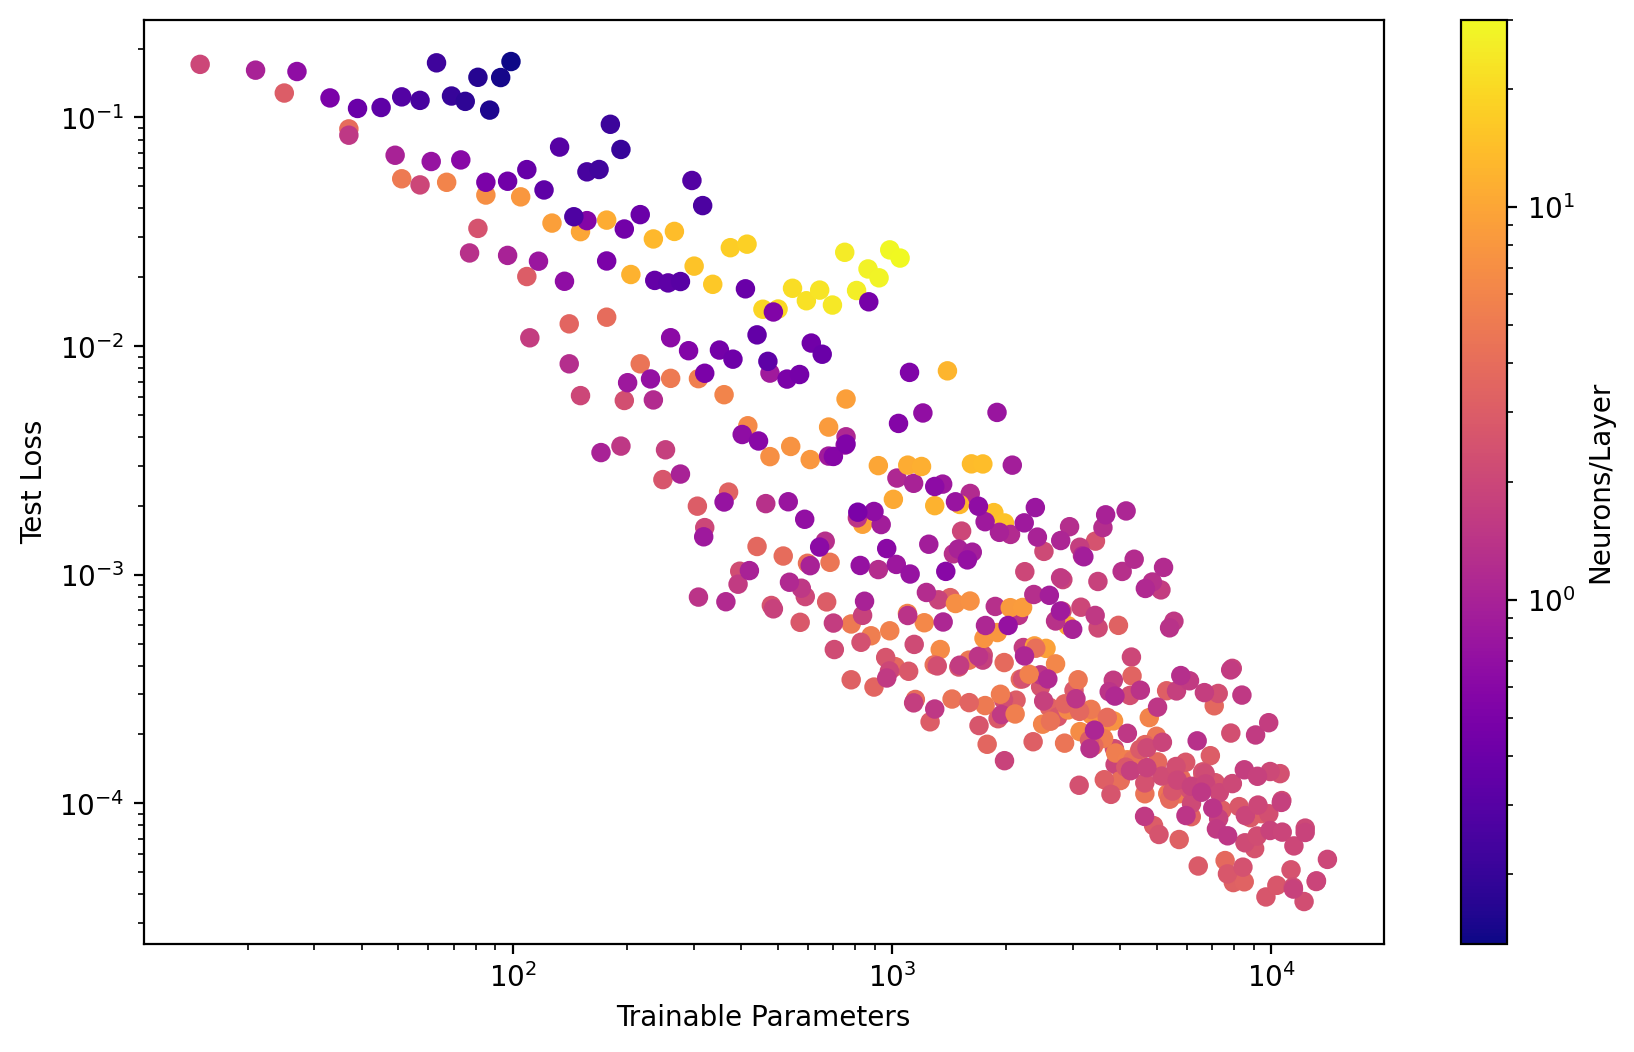

In [6]:
# plot trainable_params(x) vs. test_loss(y)
plt.figure(figsize=(10,6))
scatter = plt.scatter(data['trainable_params'], data['avg_test_loss'], 
                     c=data['neurons/layers'], cmap='plasma', 
                     norm=plt.matplotlib.colors.LogNorm())
plt.xlabel('Trainable Parameters')
plt.ylabel('Test Loss')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(scatter, label='Neurons/Layer')

Observe that that most "elongated" networks (the ones with few hidden layers with lots of neurons or ones with many hidden layers with few neurons in each) perform the worst. Most "square" networks tend to perform the best, when comparing networks for roughly the same number of trainable parameters.

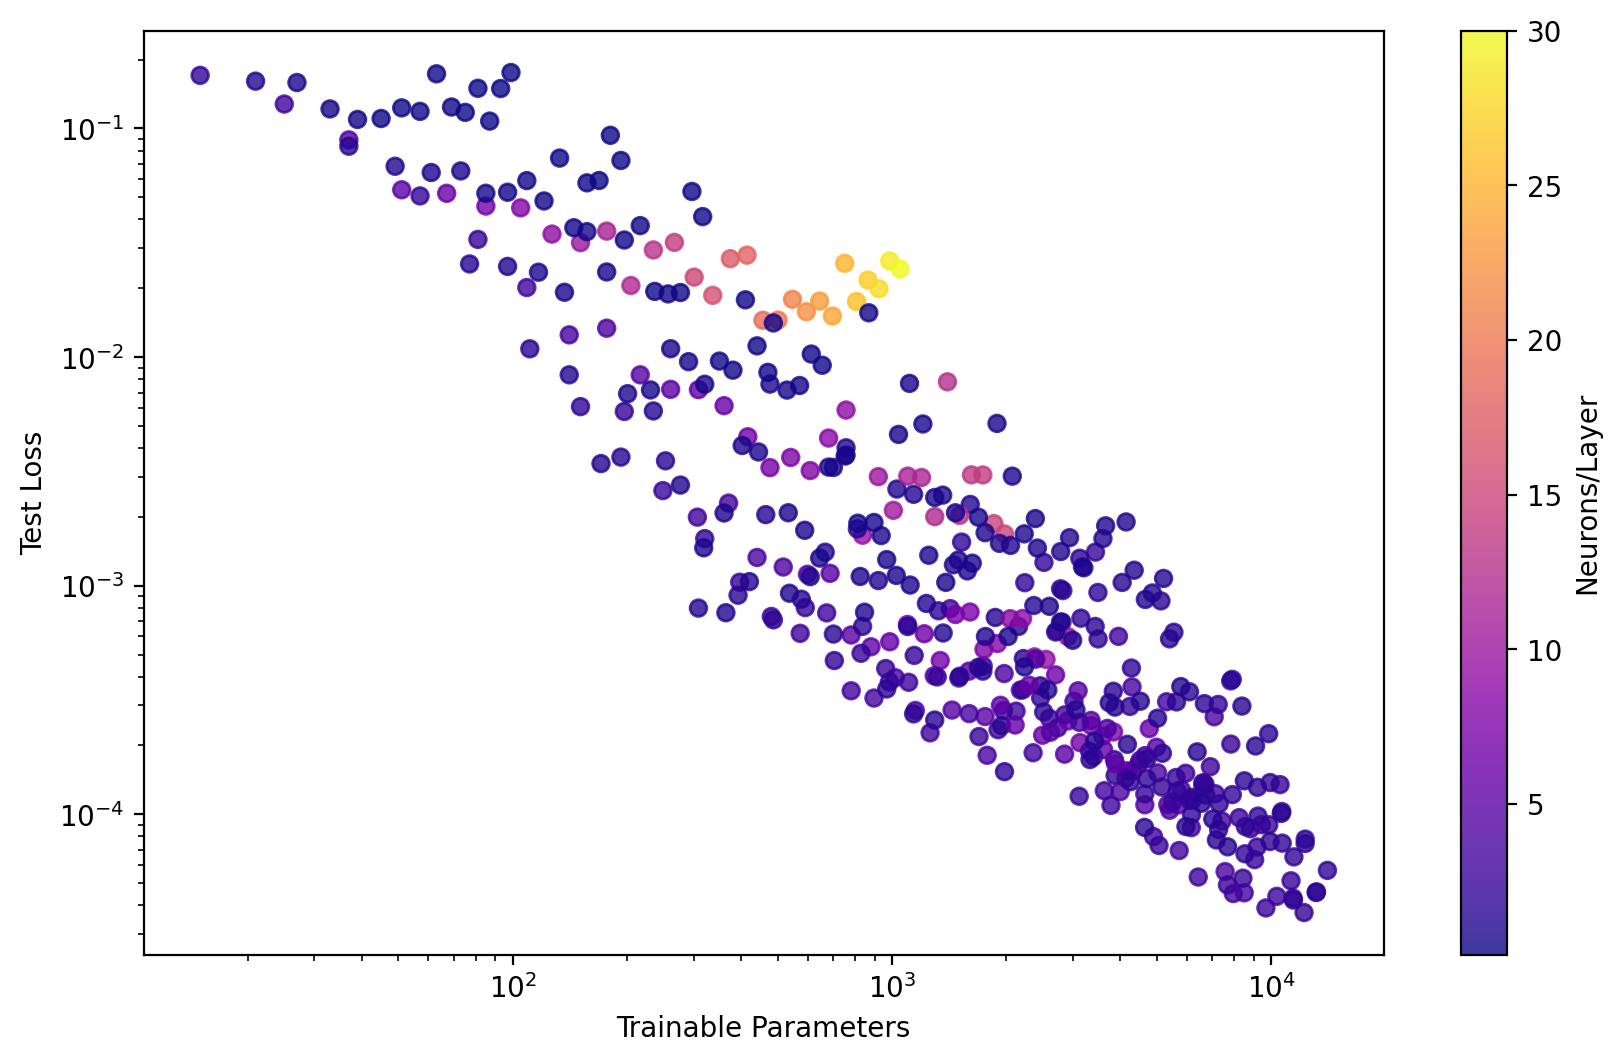

In [7]:
# plot trainable_params(x) vs. test_loss(y)
plt.figure(figsize=(10,6))
scatter = plt.scatter(data['trainable_params'], data['avg_test_loss'], 
                     c=data['neurons/layers'], cmap='plasma', alpha=0.8)
plt.xlabel('Trainable Parameters')
plt.ylabel('Test Loss')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(scatter, label='Neurons/Layer')

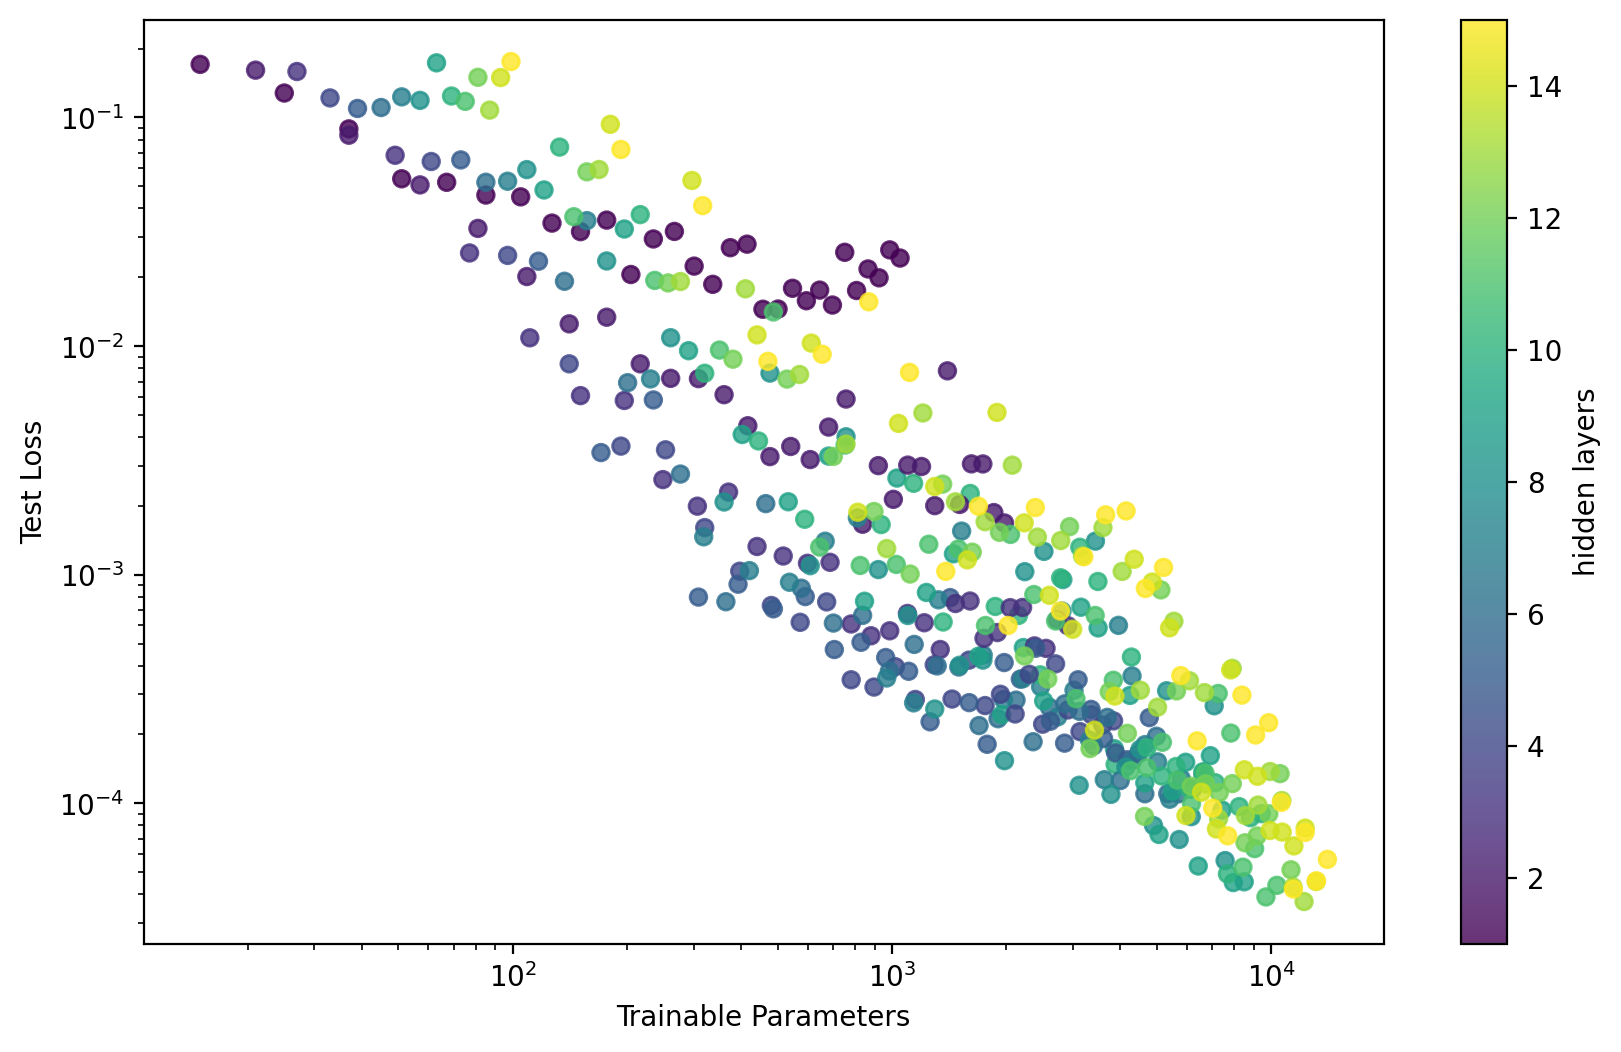

In [12]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(data['trainable_params'], data['avg_test_loss'], 
                     c=data['hidden_layers'], cmap='viridis', alpha=0.8)
plt.xlabel('Trainable Parameters')
plt.ylabel('Test Loss')
plt.yscale('log')
plt.xscale('log')
plt.colorbar(scatter, label='hidden layers')

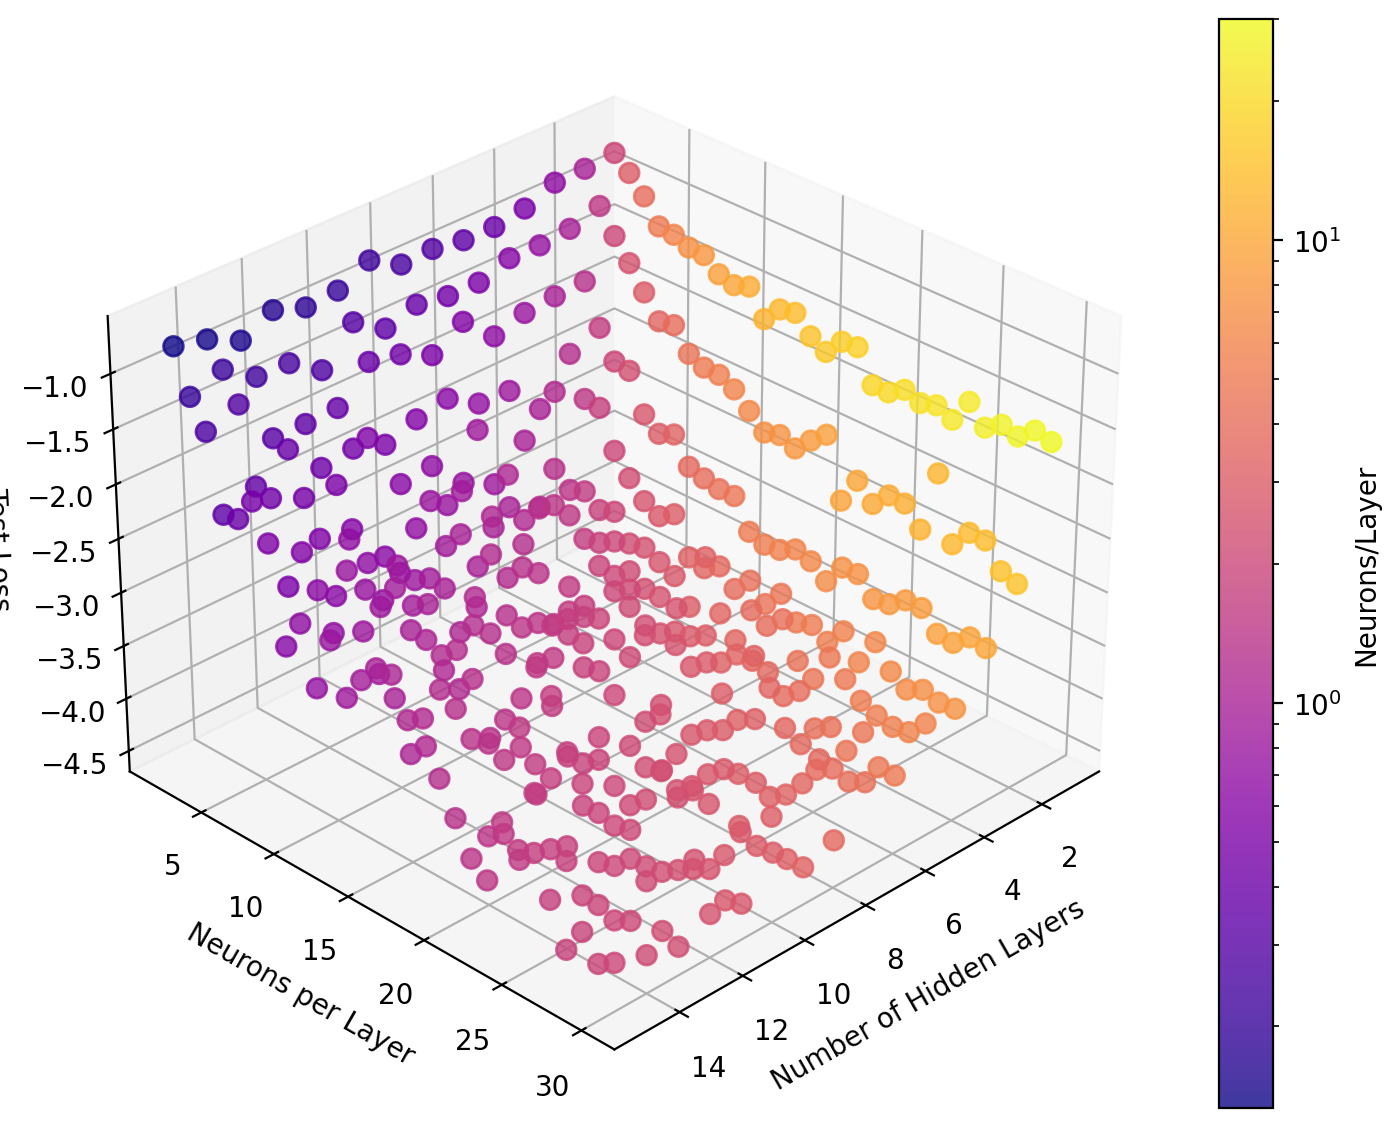

In [9]:
# Create a 3D plot with hidden_layers, neurons_per_layer, and avg_test_loss

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter points
scatter = ax.scatter(data['hidden_layers'], 
                    data['neurons_per_layer'], 
                    np.log10(data['avg_test_loss']),
                    c=data['neurons/layers'],
                    cmap='plasma',
                    s=50,
                    alpha=0.8,
                    norm=colors.LogNorm())

# Set labels for each axis
ax.set_xlabel('Number of Hidden Layers')
ax.set_ylabel('Neurons per Layer')
ax.set_zlabel('Test Loss')

# Add a color bar to show the mapping of colors to test loss values
plt.colorbar(scatter, label='Neurons/Layer')

# Add margins around the plot to prevent labels from being cut off
plt.tight_layout(pad=2.0)  


# Adjust the viewing angle for better visualization
ax.view_init(elev=30, azim=45)

In [10]:
# compute total training time
total_time_hours = (np.sum(data['training_time_seconds']) / 3600 ) * 4 # Convert seconds to hours

print(f"Total training time {total_time_hours.round(4)} hours.")

Total training time 8.6098 hours.
